In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
df = pd.read_csv("final.csv", parse_dates=['date'])

In [3]:
df["mmndvi"] = (df.max_ndvi + 2000) / 12000

### ANWR region

In [4]:
df_anwr = df[df.region == "anwr"]

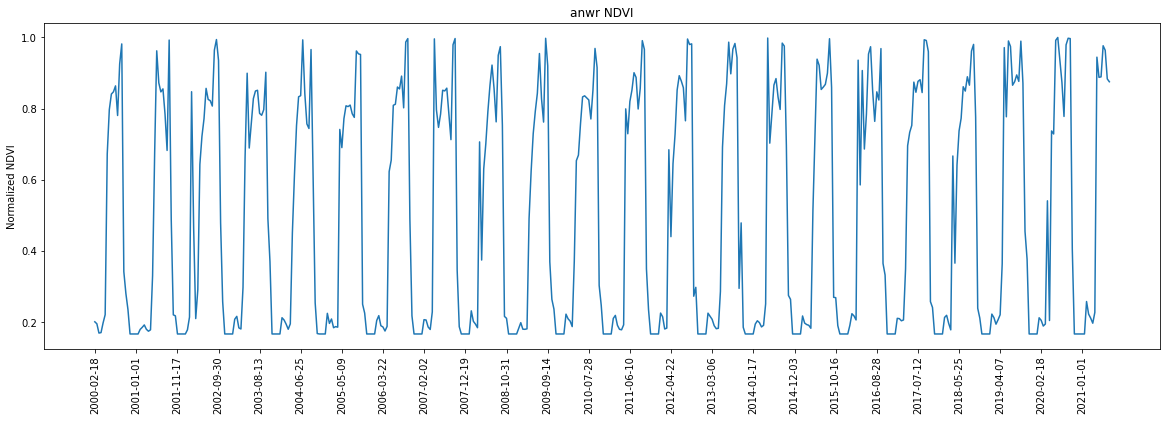

In [5]:
_df = df_anwr.copy()
_df['date'] = pd.to_datetime(_df['date']).dt.date
plt.figure(figsize=(20,6))
plt.title("anwr NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date[::20], _df.date[::20], rotation='vertical')
plt.plot(_df.date, _df.mmndvi)

Linear regression: r=0.23562, p=0.29115, std_err=0.00071
Slope: 0.00077
Average max NDVI: 0.98344


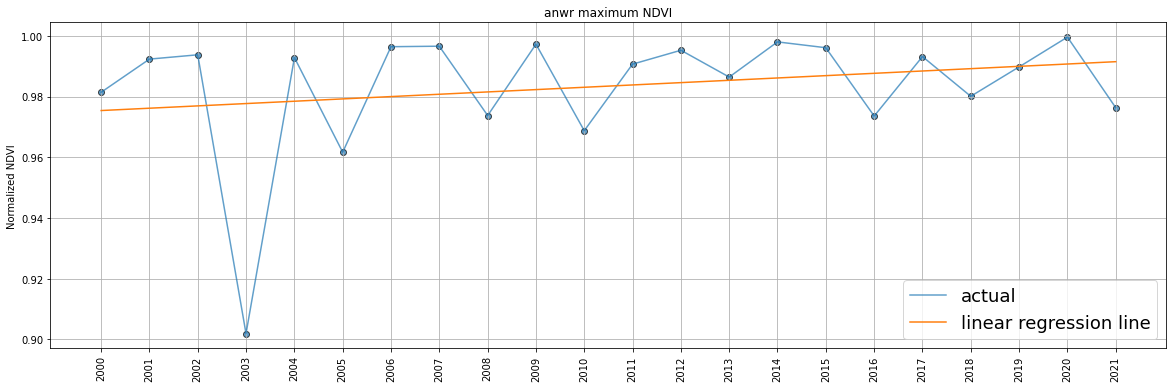

In [6]:
_df = df_anwr.copy()
_df = _df.groupby(by=pd.Grouper(key='date', freq='Y')).max()
_df["date"] = _df.index
_df['date'] = pd.to_datetime(_df['date']).dt.date
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("anwr maximum NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

Linear regression: r=-0.13871, p=0.53815, std_err=0.00050
Slope: -0.00032
Average max NDVI: 0.98344


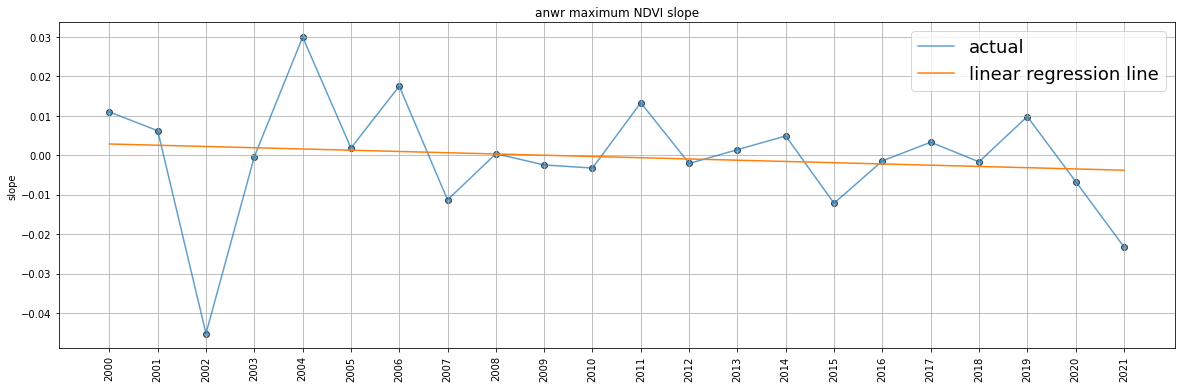

In [7]:
_df["slope"] = np.gradient(_df.mmndvi, 1)
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.slope)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("anwr maximum NDVI slope")
plt.ylabel("slope")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.slope, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.slope, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

In [ ]:
_df = _df.sort_values("mmndvi")
m, c, r_value, p_value, std_err = linregress(_df.mmndvi, _df.slope)
_y = np.arange(np.min(_df.mmndvi), np.max(_df.mmndvi), (np.max(_df.mmndvi) - np.min(_df.mmndvi))/len(_df.mmndvi))
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("North Slope Transect MODIS Average Max NDVI vs. Multiyear NDVI Trends")
plt.ylabel("Multiyear Summer Max NDVI Trends")
plt.xlabel("Average Summer Maximum NDVI")
#plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.mmndvi, _df.slope, alpha=0.7, edgecolors="k")
plt.plot(_df.mmndvi, _df.slope, alpha=0.7, label="actual")
plt.plot(_df.mmndvi, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")
_df

### Ivotuk region

In [9]:
df_ivotuk = df[df.region == "ivotuk_north"]

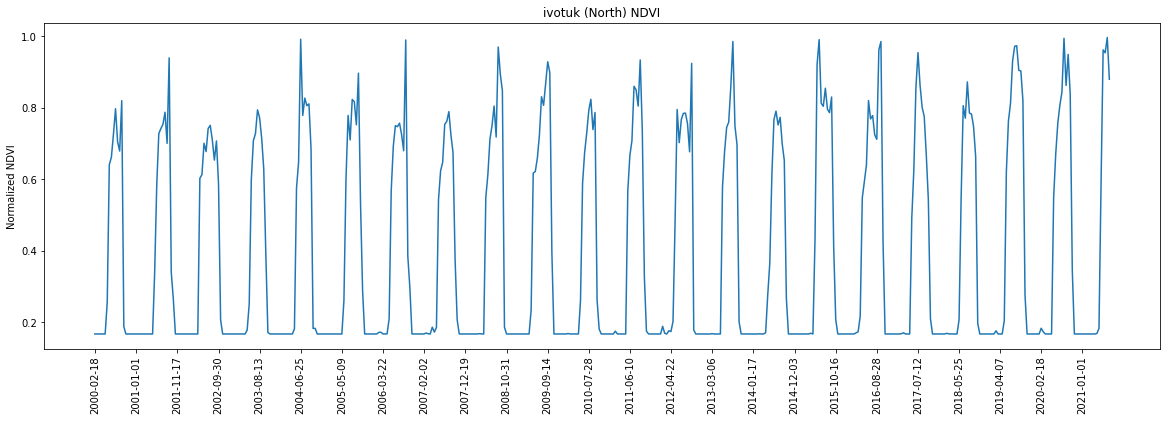

In [10]:
_df = df_ivotuk.copy()
_df['date'] = pd.to_datetime(_df['date']).dt.date
plt.figure(figsize=(20,6))
plt.title("ivotuk (North) NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date[::20], _df.date[::20], rotation='vertical')
plt.plot(_df.date, _df.mmndvi)

Linear regression: r=0.46403, p=0.02960, std_err=0.00251
Slope: 0.00588
Average max NDVI: 0.91389


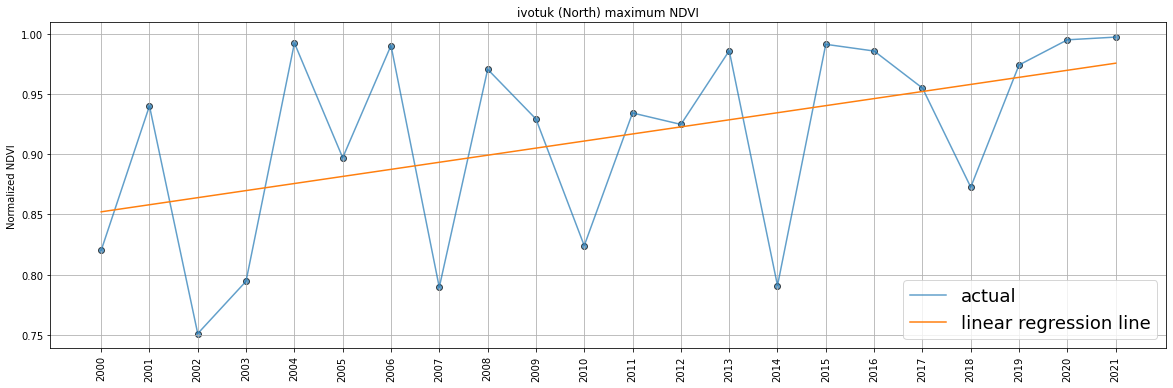

In [11]:
_df = df_ivotuk.copy()
_df = _df.groupby(by=pd.Grouper(key='date', freq='Y')).max()
_df["date"] = _df.index
_df['date'] = pd.to_datetime(_df['date']).dt.date
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("ivotuk (North) maximum NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

In [12]:
df_ivotuk = df[df.region == "ivotuk_south"]

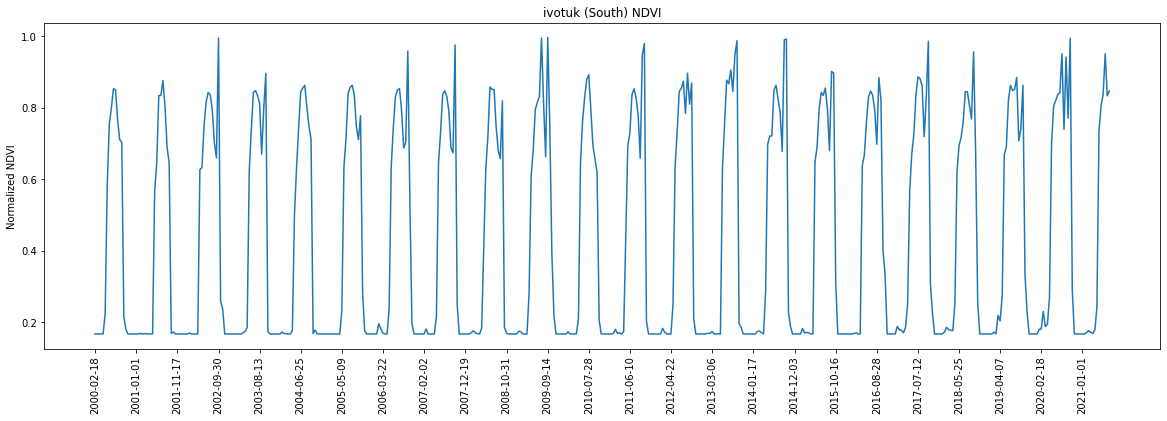

In [13]:
_df = df_ivotuk.copy()
_df['date'] = pd.to_datetime(_df['date']).dt.date
plt.figure(figsize=(20,6))
plt.title("ivotuk (South) NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date[::20], _df.date[::20], rotation='vertical')
plt.plot(_df.date, _df.mmndvi)

Linear regression: r=0.35250, p=0.10762, std_err=0.00174
Slope: 0.00293
Average max NDVI: 0.92853


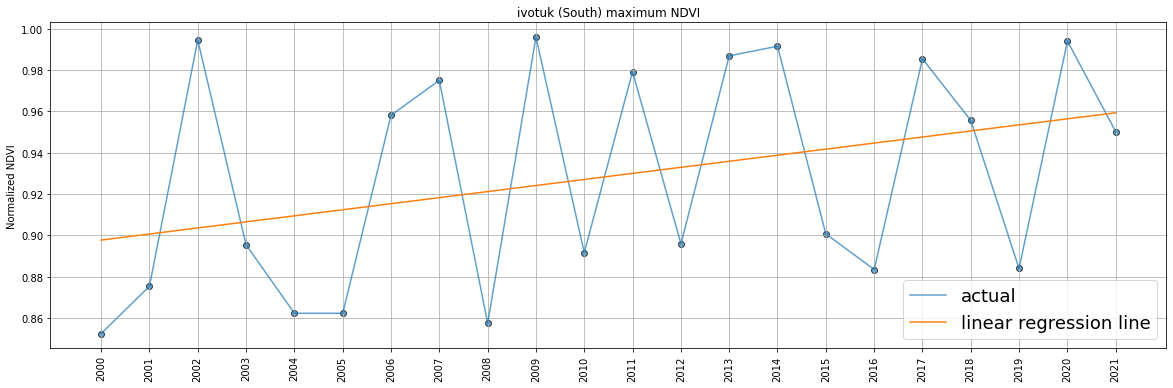

In [14]:
_df = df_ivotuk.copy()
_df = _df.groupby(by=pd.Grouper(key='date', freq='Y')).max()
_df["date"] = _df.index
_df['date'] = pd.to_datetime(_df['date']).dt.date
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("ivotuk (South) maximum NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

### prudhoebay region

In [15]:
df_prudhoebay = df[df.region == "prudhoebay"]

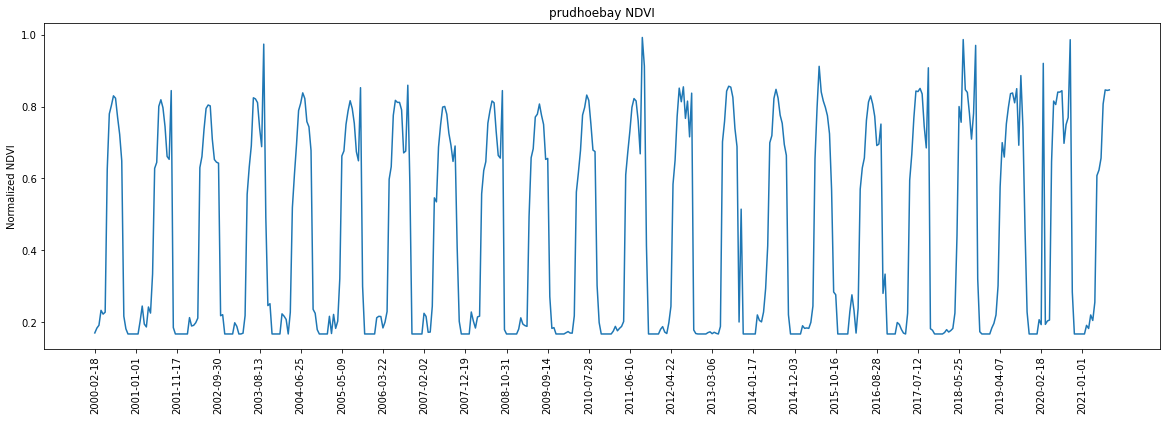

In [16]:
_df = df_prudhoebay.copy()
_df['date'] = pd.to_datetime(_df['date']).dt.date
plt.figure(figsize=(20,6))
plt.title("prudhoebay NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date[::20], _df.date[::20], rotation='vertical')
plt.plot(_df.date, _df.mmndvi)

Linear regression: r=0.38764, p=0.07467, std_err=0.00194
Slope: 0.00364
Average max NDVI: 0.87286


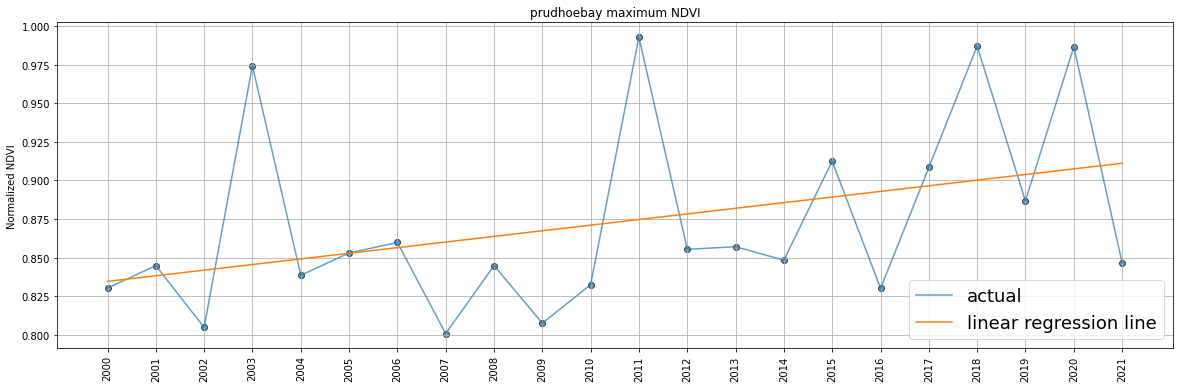

In [17]:
_df = df_prudhoebay.copy()
_df = _df.groupby(by=pd.Grouper(key='date', freq='Y')).max()
_df["date"] = _df.index
_df['date'] = pd.to_datetime(_df['date']).dt.date
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("prudhoebay maximum NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")